# Note:
This is a sample notebook containing the python script that was used during my project. During the project, the following process was repeated across each of the day's of observation. For simplicity and ease of reading this noteboook will focus upon the 16th of August 2023 as it was one of the best days of observation. 

On this day of observation, the telescope started it's data collection from the pole of the planet.

Important point: This notebook will use data not provided in the GitHub repo, this is necessary to show the outcomes of the project. Below is an example cell that provide instructions on how to load the data provided in the repo, in case you wish to run this code on your machine, if so ensure you change the appropriate filenames.

In [2]:
# Importing Libraries
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import os
import h3ppy

In [10]:
# Example of how to load the data
fits_image_order2 = r'C:\Users\Furio\Downloads\jup.014\jup.014.order.02.fits.gz'

fits_units_order2 = r'C:\Users\Furio\Downloads\wavelength.order.2.fits.gz'

fits_image_order3 = r'C:\Users\Furio\Documents\Downloads\jup.014\jup.014.order.03.fits.gz'

fits_units_order3 = r'C:\Users\Furio\Documents\Downloads\jup.014\wavelength.order.3.fits.gz'

fits_image_order4 = r'C:\Users\Furio\Downloads\jup.014\jup.014.order.04.fits.gz'

fits_units_order4 = r'C:\Users\Furio\Documents\Downloads\jup.014\wavelength.order.4.fits.gz'

fits_image_order5 = r'C:\Users\Furio\Downloads\jup.014\jup.014.order.05.fits.gz'

fits_units_order5 = r'C:\Users\Furio\Documents\Downloads\jup.014\wavelength.order.5.fits.gz'

fits_image_order7 = r'C:\Users\Furio\Downloads\jup.014.order.07.fits.gz'

fits_units_order7 = r'C:\Users\Furio\Documents\Downloads\jup.014\wavelength.order.7.fits.gz'


## Finding H3+ Emission lines at order 2

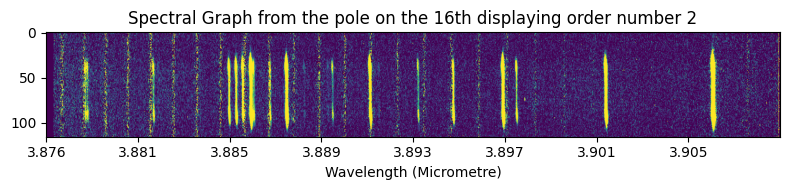

In [48]:
# Plotting Observed H3+ emission lines at order 2
# Creating Spectral graphs for each of the wavelength orders 
num_points = 2048
num_divisions = 8
step = num_points // num_divisions
num_orders = 1

#Creating Figure
fig, ax = plt.subplots(figsize=(8, 2)) 
plt.subplots_adjust(hspace=0.3)

order = 1
filenumstr=str(order+1)
fits_image_filename4 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Jupiter\jup.014\jup.014.order.0'+filenumstr+'.fits.gz'
fits_units_filename1 = r'C:\Users\Furio\Documents\University\Third Year\Individual Physics Project\Jupiter Data\230816\Calibration\wavelength.order.'+filenumstr+'.fits.gz'

hdul4 = fits.open(fits_image_filename4)
hdulw = fits.open(fits_units_filename1)

# Data Retrieval
image_data16 = hdul4[0].data
wavelength = hdulw[0].data

# Data Cleaning
image_data16[~np.isfinite(image_data16)] = 0
round_wavelength = np.round(wavelength, decimals=3) 

# Visualisation
ax.imshow(image_data16, vmin=0, vmax=0.05, aspect='auto')

pos = np.arange(len(round_wavelength))
ax.set_xticks(pos[::step])
ax.set_xticklabels(round_wavelength[::step])

ax.set_xlabel('Wavelength (Micrometre)')
ax.set_title('Spectral Graph from the pole on the 16th displaying order number ' + filenumstr)

plt.tight_layout()
plt.show()

## Testing via the use of h3ppy if observed emission lines are in fact H3+

Wavelength is [3.8760912 3.8761086 3.8761263 ... 3.908748  3.9087622 3.9087768]
D:\Apps\anaconda3\Lib\site-packages\h3ppy
Wave order 2 is [3.87399125 3.87402248 3.87405372 ... 3.90587997 3.90591121 3.90594244]
model h3p_order2 is [1.06665847e-10 1.58250575e-08 1.03381697e-06 ... 0.00000000e+00
 0.00000000e+00 0.00000000e+00]


<Figure size 1200x1400 with 0 Axes>

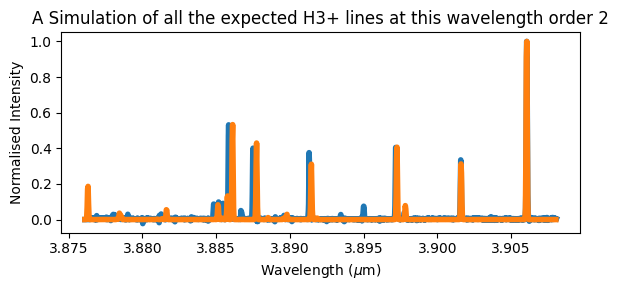

In [24]:
# Opening and defining the units
hdulw = fits.open(fits_units_order2)
wavelength = hdulw[0].data
print('Wavelength is', wavelength)

# Obtaining and cleaning the data
hdul4 = fits.open(fits_image_order2)
image_data2 = hdul4[0].data
image_data2[~np.isfinite(image_data2)] = 0

# Defining the range
#########################
xstart=0
xend=2000
########################

length = xstart-xend


# Data Visualisation
plt.figure(figsize=(12, 14))

# Creating a H3+ object via the use of h3ppy that we can model later
h3p = h3ppy.h3p()
wavelength_offset=-0.0021

""" Defining a wavelength range, e.g. typical of an observation of H3+. This is done via 
specifying the start and end wavelengths, and the number of wavelength elements """

wave_order2 = h3p.wavegen(wavelength[xstart]+wavelength_offset, wavelength[xend]+wavelength_offset, 1024)
print('Wave order 2 is', wave_order2)

 
"""
Creating a model based upon the H3+ object previously made. 
This model has the following parameters:
Spectral Resolution (R) = 1200
Temperature (T) = 1000 (Measured in Kelvin, Jupiter's upper atmosphere is HOT!)
Column Density (m^-2) = 1e16 (Typically 1e16 for polar regions and 1e15 for equatorial regions)
"""
model_h3p_order2 = h3p.model(density = 1e16, temperature = 1000, R = 45000, wavelength = wave_order2)
print('model h3p_order2 is', model_h3p_order2)

# Creates a 2d array of a slice of the H3+ emission line
coadd_int = np.mean(image_data2[60:100, xstart:xend],axis=0)

# Plot the model
fig, ax = plt.subplots(figsize=(6, 3))

ax.plot(wavelength[xstart:xend], coadd_int/np.max(coadd_int), linewidth = 4)
ax.plot(wave_order2-wavelength_offset, model_h3p_order2/np.max(model_h3p_order2), linewidth = 4)

ax.set_xlabel(h3p.xlabel())
ax.set_ylabel("Normalised Intensity")
plt.title("A Simulation of all the expected H3+ lines at this wavelength order 2")
plt.tight_layout()
plt.show()